# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [1]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [2]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [4]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([0, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [5]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0



We can use a more readable and visual way as follows:

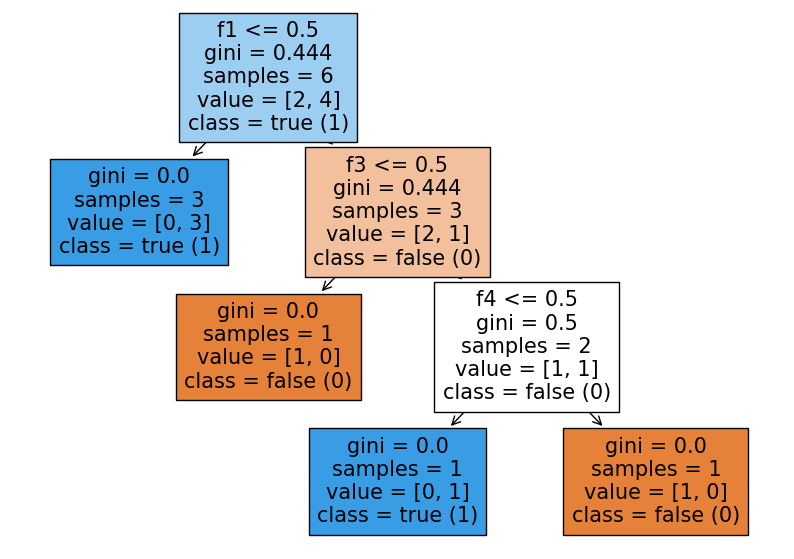

In [6]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf,feature_names= ("f1","f2","f3","f4"),class_names= ("false (0)", "true (1)" ),filled=True)








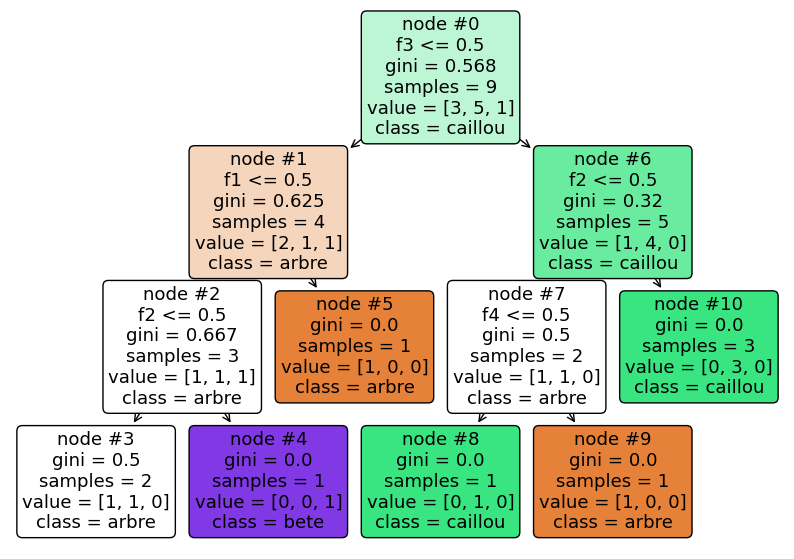

In [7]:
# X is the training set 
# Each example in X has 4 binary features
Xtask = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0],[0,1,1,0],[0,0,0,1],[0,1,1,1]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Ytask = [1, 2, 0, 0, 1, 1,1,0,1]

clftask = tree.DecisionTreeClassifier()
clftask = clf.fit(Xtask, Ytask)


figtask = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clftask,feature_names= ("f1","f2","f3","f4"),class_names= ("arbre", "caillou", "bete"),filled=True,impurity=True,node_ids=True,rounded=True)





Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. 



## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
- How many examples in the dataset?
- What are your expectations regarding the most important features? 
- Propose (informally) a way to reduce the dataset
- There many ways to binarize the dataset. How do you propose to do so?



Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset compass.csv
- The set of tools utils.py

Load the binary dataset `compass.csv` as follows 

In [10]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

print(train_labels)

[1 0 0 ... 1 0 1]


Inspect each of these 4 objects. What do they represent? How many features? examples? 

Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter
- max_depth 
- min_samples_leaf 

What do they represent? 


**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


#inutile
x_train1, x_test1, y_train1, y_test1 = train_test_split(train_examples, train_labels,random_state=1, test_size = 0.20)
x_train2, x_test2, y_train2, y_test2 = train_test_split(train_examples, train_labels,random_state=1, test_size = 0.20)
x_train3, x_test3, y_train3, y_test3 = train_test_split(train_examples, train_labels,random_state=1, test_size = 0.20)




clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=1000, min_samples_leaf= 1)
clftask1 = clftask1.fit(x_train1,y_train1)
scores1 = cross_val_score(clftask1, x_train1,y_train1, cv=5)
conf1 = confusion_matrix(y_test1,clftask1.predict(x_test1))

clftask2 = tree.DecisionTreeClassifier(splitter = "best", max_depth=5, min_samples_leaf= 15)
clftask2 = clftask2.fit(train_examples,train_labels)
scores2 = cross_val_score(clftask2, train_examples, train_labels, cv=5)





clftask3 = tree.DecisionTreeClassifier(splitter = "random", max_depth=40, min_samples_leaf= 30)
clftask3 = clftask2.fit(train_examples,train_labels)
scores3 = cross_val_score(clftask3, train_examples, train_labels, cv=5)


print(scores1.mean() , scores1.std() , " , " , scores2.mean() ,scores2.std(), " , ", scores3.mean(),scores3.std())
print(conf1)

0.6458048720154268 0.01767045089986452  ,  0.6605350863782296 0.0047370184293747016  ,  0.6605350863782296 0.0047370184293747016
[[417 125]
 [236 277]]


In [ ]:
#pour tester si l'algorithme est juste avec un groupe ethnique, on evalue sans prendre en compte l'ethnicité,
#puis on prend le sample de ce groupe comme notre y_test.  